<h2> 
Predicting a song is hit or not, based on its the audio features.
</h2>


<h3>Importing Libraries</h3>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.shape

(114000, 21)

In [4]:
df.columns[df.isnull().any()]

Index(['artists', 'album_name', 'track_name'], dtype='object')

In [5]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [6]:
df.drop(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name'], axis=1, inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        114000 non-null  int64  
 1   duration_ms       114000 non-null  int64  
 2   explicit          114000 non-null  bool   
 3   danceability      114000 non-null  float64
 4   energy            114000 non-null  float64
 5   key               114000 non-null  int64  
 6   loudness          114000 non-null  float64
 7   mode              114000 non-null  int64  
 8   speechiness       114000 non-null  float64
 9   acousticness      114000 non-null  float64
 10  instrumentalness  114000 non-null  float64
 11  liveness          114000 non-null  float64
 12  valence           114000 non-null  float64
 13  tempo             114000 non-null  float64
 14  time_signature    114000 non-null  int64  
 15  track_genre       114000 non-null  object 
dtypes: bool(1), float64(

In [8]:
df.shape

(114000, 16)

In [9]:
df.song_duration_ms= df.duration_ms.astype(float)
df.time_signature= df.time_signature.astype(float)

In [10]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [11]:
df["popularitybinary"]= [ 1 if i>=50 else 0 for i in df.popularity ]
df["popularitybinary"].value_counts()

0    84633
1    29367
Name: popularitybinary, dtype: int64

If 'probability' > 50 we labeled it "1" and if it is < 50 we labeled it "0". In this way we have "1" for the popular songs and "0" for the unpopular ones in the column df["popularitybinary"].

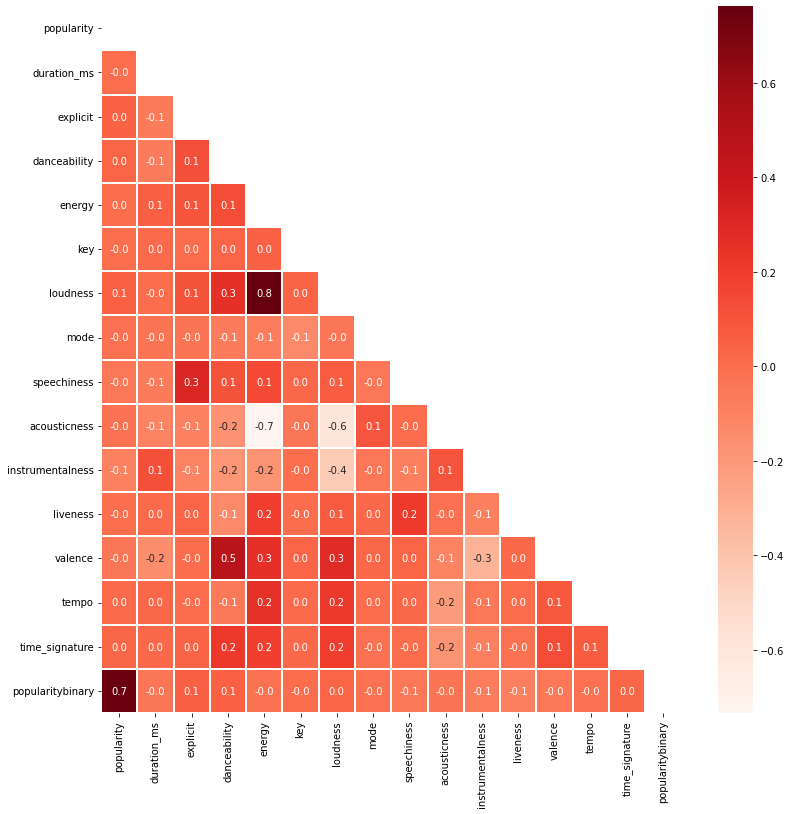

In [12]:
f,ax = plt.subplots(figsize=(13, 13))
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), annot=True, linewidths=0.4,linecolor="white", fmt= '.1f',ax=ax,cmap="Reds",mask=mask)
plt.show() 

A correlation heatmap showing a 2 dimentional correlation-matrix, using colored cells to represent data from usually a monochromatic scale.

The correlation between 'loudness' and 'energy' is 0.8 which is strong.
Except that all the correlations are quite low. 
When we compare the correlation between popularitybinary and all other features, we don't see a strong correlation (a linear relationship) that gives us a clear information about popularity. 
Explicit, danceability and loudness seems to have correlation with popularity feature(0.10) and istrumentalness, acousticness and liveness  has (-0.10).

Features distribution

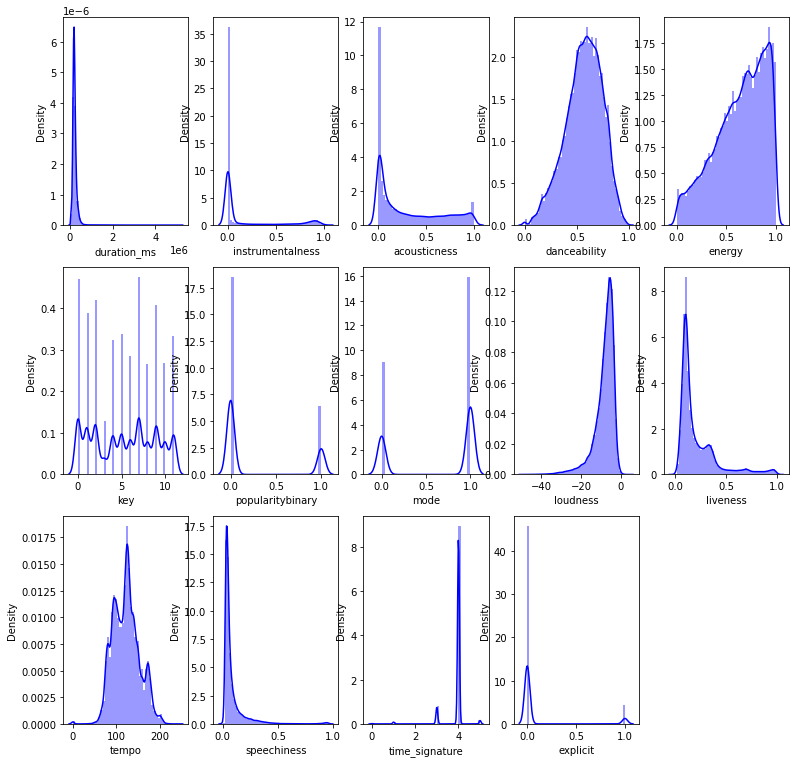

In [13]:
f, axes = plt.subplots(3, 5, figsize=(13, 13))
sns.distplot( df["duration_ms"] , color="Blue", ax=axes[0,0])
sns.distplot( df["instrumentalness"] , color="Blue", ax=axes[0,1])
sns.distplot( df["acousticness"] , color="Blue", ax=axes[0,2])
sns.distplot( df["danceability"] , color="Blue", ax=axes[0,3])
sns.distplot( df["energy"] , color="Blue", ax=axes[0, 4])
sns.distplot( df["key"] , color="Blue", ax=axes[1,0])
sns.distplot( df["popularitybinary"] , color="Blue", ax=axes[1,1])
sns.distplot( df["mode"] , color="Blue", ax=axes[1,2])
sns.distplot( df["loudness"] , color="Blue", ax=axes[1,3])
sns.distplot( df["liveness"] , color="Blue", ax=axes[1,4])
sns.distplot( df["tempo"] , color="Blue", ax=axes[2,0])
sns.distplot( df["speechiness"] , color="Blue", ax=axes[2,1])
sns.distplot( df["time_signature"] , color="Blue", ax=axes[2,2])
sns.distplot( df["explicit"] , color="Blue", ax=axes[2,3])
sns.distplot( df["valence"] , color="Blue", ax=axes[2,4])

f.delaxes(axes[2][4])
plt.show()

The distribution of songs features like dancebility, energy, loudness and tempo are quite high. People like fast and loud music.

In [14]:
df.drop(["popularity", "track_genre", "explicit"],axis=1,inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   duration_ms       114000 non-null  int64  
 1   danceability      114000 non-null  float64
 2   energy            114000 non-null  float64
 3   key               114000 non-null  int64  
 4   loudness          114000 non-null  float64
 5   mode              114000 non-null  int64  
 6   speechiness       114000 non-null  float64
 7   acousticness      114000 non-null  float64
 8   instrumentalness  114000 non-null  float64
 9   liveness          114000 non-null  float64
 10  valence           114000 non-null  float64
 11  tempo             114000 non-null  float64
 12  time_signature    114000 non-null  float64
 13  popularitybinary  114000 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 12.2 MB


In [16]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [17]:
def change_type(var): df[var] = df[var].astype(int)

Data Preparation

In [18]:
y = df["popularitybinary"].values
#x_data=df.drop(["popularitybinary"],axis=1)


#normalization
z = (df - np.min(df))/(np.max(df)-np.min(df)).values

In [19]:
X_train = df.copy()
y_train = df.pop("popularitybinary")

In [20]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter

In [21]:
#to balance the distribution of popularity binary
ros = RandomOverSampler()

X_train, y_train = ros.fit_resample(X_train, y_train)

print(Counter(y_train))

Counter({1: 84633, 0: 84633})


In [22]:
print(X_train.value_counts())

duration_ms  danceability  energy  key  loudness  mode  speechiness  acousticness  instrumentalness  liveness  valence  tempo    time_signature  popularitybinary
162897       0.647         0.876   10   -5.662    1     0.1850       0.88100       0.000036          0.2600    0.9490   151.925  4.0             0                   146
118840       0.602         0.553   11   -9.336    1     0.0328       0.10800       0.000000          0.0512    0.9710   130.594  4.0             0                    76
172342       0.795         0.565   3    -4.457    0     0.0948       0.13100       0.000000          0.0802    0.5500   87.925   4.0             0                    73
131733       0.579         0.502   8    -7.570    1     0.0513       0.73300       0.000000          0.2810    0.8360   76.783   4.0             0                    69
243057       0.503         0.582   0    -4.324    1     0.0253       0.47200       0.000000          0.1030    0.3260   77.321   4.0             0                

In [23]:
X_train.to_csv("training.csv")